In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sghmc_algo as sghmc

## Example 1 on paper pg6 (fig 1)

$U(\theta) = 2\theta^2+\theta^4$  
$\nabla U(\theta) = -4\theta + 4\theta^3$  
$\nabla\tilde{U}(\theta) = \nabla U(\theta)+\mathcal{N}(0,4) = -4\theta + 4\theta^3 + \mathcal{N}(0,4)$ 

In [3]:
np.random.seed(123)
n = 100
x = np.zeros((100, 1))
theta_0 = np.array([0.0])
p = theta_0.shape[0]
eps = 0.1
C = np.eye(1)
V = np.eye(1)*4
batch_size = 1
epochs = 4000
burns = 200

In [4]:
def gradU_noise(theta, x, n, batch_size):
    '''noisy gradient from paper fig1'''
    return -4*theta + 4*theta**3 + np.random.normal(0,2)

In [5]:
sim = sghmc.sghmc(gradU_noise, eps, C, np.eye(p), theta_0, V, epochs, burns, x, batch_size)

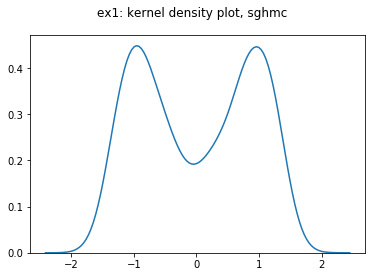

In [6]:
plt1 = sns.kdeplot(sim[0,:])
plt.suptitle("ex1: kernel density plot, sghmc")
fig1 = plt1.get_figure()
fig1.savefig("ex1_sghmc.png")

## Mixture of Normals

sampling model: $X \sim \frac{1}{2}\mathcal{N}(\mu_1, 1) + \frac{1}{2}\mathcal{N}(\mu_2, 1)$  

prior: $\mu_1, \mu_2 \sim \mathcal{N}(0, 10)$

In [7]:
from autograd import jacobian
import autograd.numpy as np

In [8]:
mu = np.array([-3,3]).reshape(2,1)

In [9]:
def lprior(theta):
    return (-1/(2*10))*theta.T@theta

def ldatap(theta, x):
    return np.log(0.5 * np.exp(-0.5*(theta[0]-x)**2) + 0.5* np.exp(-0.5*(theta[1]-x)**2))

def U(theta, x, n, batch_size):
    return -lprior(theta) - (n/batch_size)*sum(ldatap(theta, x))

gradU = jacobian(U, argnum = 0)

In [10]:
np.random.seed(123)
n = 200
x = np.r_[
    np.random.normal(mu[0], 1, n),
    np.random.normal(mu[1], 1, n)].reshape(-1,1)

theta_0 = np.array([0, 0])
eps = 0.01
V_hat = np.eye(2)
C = np.eye(2)
epochs = 200
burns = 100
batch_size = 80

In [11]:
sim_mn = sghmc.sghmc(gradU, eps, C, np.eye(2), theta_0, V_hat, epochs, burns, x, batch_size)

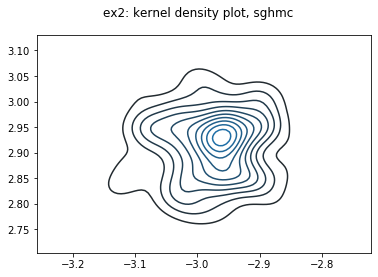

In [12]:
plt2 = sns.kdeplot(sim_mn[0,:],sim_mn[1,:])
plt.suptitle("ex2: kernel density plot, sghmc")
fig2 = plt2.get_figure()
fig2.savefig("ex2_sghmc.png")